In [16]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler



In [17]:
df=pd.read_csv('data.csv')

In [18]:
df=df.drop(columns=['id'])

In [19]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [20]:
df["diagnosis"] = df["diagnosis"].replace({"M": 1, "B": 0})


C:\Users\ilias\AppData\Local\Temp\ipykernel_28596\3042100112.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["diagnosis"] = df["diagnosis"].replace({"M": 1, "B": 0})


In [21]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


           count  percent
diagnosis                
0            357    62.74
1            212    37.26

Imbalance ratio (max/min): 1.68
⚠️ La distribution semble déséquilibrée (>1.5).


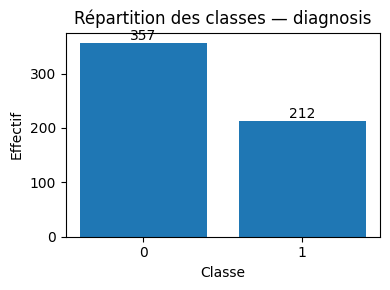

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Comptes & pourcentages
counts = df["diagnosis"].value_counts(dropna=False)
pct = df["diagnosis"].value_counts(normalize=True, dropna=False) * 100

summary = pd.DataFrame({"count": counts, "percent": pct.round(2)})
print(summary)          # tableau récapitulatif
print()

# 2) Alerte simple d’(dés)équilibre
if counts.min() > 0:
    imbalance_ratio = counts.max() / counts.min()
    print(f"Imbalance ratio (max/min): {imbalance_ratio:.2f}")
    if imbalance_ratio > 1.5:
        print("⚠️ La distribution semble déséquilibrée (>1.5).")
else:
    print("⚠️ Une des classes a un count nul.")

# 3) Visualisation (barres)
plt.figure(figsize=(4,3))
plt.title("Répartition des classes — diagnosis")
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel("Classe")
plt.ylabel("Effectif")
for x, y in zip(counts.index.astype(str), counts.values):
    plt.text(x, y, str(y), ha="center", va="bottom")
plt.tight_layout()
plt.show()


In [23]:
X = df.drop(columns=["diagnosis"])  # garder seulement les variables explicatives
y = df["diagnosis"]

In [24]:

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.40, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)
rus = RandomUnderSampler(random_state=42)              # default → balance 1:1
X_train_bal, y_train_bal = rus.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_std = pd.DataFrame(scaler.fit_transform(X_train_bal), index=X_train_bal.index, columns=X_train_bal.columns)
X_val_std   = pd.DataFrame(scaler.transform(X_val),   index=X_val.index,   columns=X_val.columns)
X_test_std  = pd.DataFrame(scaler.transform(X_test),  index=X_test.index,  columns=X_test.columns)


C:\Users\ilias\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\ilias\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\ilias\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [25]:
import torch, numpy as np
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, average_precision_score



In [26]:
# --- Imports and Tensor Conversion
import torch, numpy as np
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report

# --- Convert pandas DataFrames/Series to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_bal.values)
y_train_tensor = torch.FloatTensor(y_train_bal.values).reshape(-1, 1)  # Reshape to (N, 1) for BCELoss
X_val_tensor = torch.FloatTensor(X_val_std.values)
y_val_tensor = torch.FloatTensor(y_val.values).reshape(-1, 1)
X_test_tensor = torch.FloatTensor(X_test_std.values)
y_test_tensor = torch.FloatTensor(y_test.values).reshape(-1, 1)

print("Tensors created successfully!")
print(f"Training data shape: {X_train_tensor.shape}, {y_train_tensor.shape}")
print(f"Validation data shape: {X_val_tensor.shape}, {y_val_tensor.shape}")
print(f"Test data shape: {X_test_tensor.shape}, {y_test_tensor.shape}")


Tensors created successfully!
Training data shape: torch.Size([254, 31]), torch.Size([254, 1])
Validation data shape: torch.Size([114, 31]), torch.Size([114, 1])
Test data shape: torch.Size([114, 31]), torch.Size([114, 1])


In [27]:
# --- DataLoaders (batching)
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=64,  shuffle=True)
val_loader   = DataLoader(TensorDataset(X_val_tensor, y_val_tensor), batch_size=256, shuffle=False)
test_loader  = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=256, shuffle=False)

print("DataLoaders created successfully!")
print(f"Training batches: {len(train_loader)}")
print(f"Validation batches: {len(val_loader)}")
print(f"Test batches: {len(test_loader)}")


DataLoaders created successfully!
Training batches: 4
Validation batches: 1
Test batches: 1


In [28]:
# --- Model Definition (3 layers + Dropout)
in_dim = X_train_bal.shape[1]
drop_p = 0.5  # you can try 0.0 / 0.3 / 0.5
model = nn.Sequential(
    nn.Linear(in_dim, 64), nn.ReLU(inplace=True), nn.Dropout(drop_p),
    nn.Linear(64, 32),     nn.ReLU(inplace=True), nn.Dropout(drop_p),
    nn.Linear(32, 1),
    nn.Sigmoid()  # sigmoid output -> can use BCELoss
).to('cpu')

# --- Loss and Optimizer
criterion = nn.BCELoss()  # because output is already sigmoid
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

print("Model created successfully!")
print(f"Model architecture: {model}")
print(f"Input dimension: {in_dim}")
print(f"Dropout probability: {drop_p}")


Model created successfully!
Model architecture: Sequential(
  (0): Linear(in_features=31, out_features=64, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=64, out_features=32, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=32, out_features=1, bias=True)
  (7): Sigmoid()
)
Input dimension: 31
Dropout probability: 0.5


In [30]:
# --- Fix Tensor Conversion for BCELoss
# The issue is with target tensor format for BCELoss
# BCELoss expects targets to be in range [0, 1] and same shape as predictions

# Recreate tensors with proper formatting
X_train_tensor = torch.FloatTensor(X_train_bal.values)
y_train_tensor = torch.FloatTensor(y_train_bal.values).reshape(-1, 1)  # Shape (N, 1)
X_val_tensor = torch.FloatTensor(X_val_std.values)
y_val_tensor = torch.FloatTensor(y_val.values).reshape(-1, 1)
X_test_tensor = torch.FloatTensor(X_test_std.values)
y_test_tensor = torch.FloatTensor(y_test.values).reshape(-1, 1)

# Ensure target values are exactly 0.0 or 1.0 (not integers)
y_train_tensor = y_train_tensor.float()
y_val_tensor = y_val_tensor.float()
y_test_tensor = y_test_tensor.float()

print("=== FIXED TENSOR CONVERSION ===")
print(f"y_train_tensor shape: {y_train_tensor.shape}")
print(f"y_train_tensor dtype: {y_train_tensor.dtype}")
print(f"y_train_tensor min: {y_train_tensor.min()}")
print(f"y_train_tensor max: {y_train_tensor.max()}")
print(f"y_train_tensor unique values: {torch.unique(y_train_tensor)}")

# Verify all values are in valid range [0, 1]
assert (y_train_tensor >= 0).all() and (y_train_tensor <= 1).all(), "Target values must be in [0, 1]"
assert (y_val_tensor >= 0).all() and (y_val_tensor <= 1).all(), "Target values must be in [0, 1]"
assert (y_test_tensor >= 0).all() and (y_test_tensor <= 1).all(), "Target values must be in [0, 1]"

print("✅ All target tensors are valid for BCELoss!")


=== FIXED TENSOR CONVERSION ===
y_train_tensor shape: torch.Size([254, 1])
y_train_tensor dtype: torch.float32
y_train_tensor min: 0.0
y_train_tensor max: 1.0
y_train_tensor unique values: tensor([0., 1.])
✅ All target tensors are valid for BCELoss!


In [31]:
# --- Recreate DataLoaders with Fixed Tensors
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=64, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_tensor, y_val_tensor), batch_size=256, shuffle=False)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=256, shuffle=False)

print("=== FIXED DATALOADERS ===")
print(f"Training batches: {len(train_loader)}")
print(f"Validation batches: {len(val_loader)}")
print(f"Test batches: {len(test_loader)}")

# Test a sample batch to ensure no errors
print("\n=== TESTING SAMPLE BATCH ===")
for i, (xb, yb) in enumerate(train_loader):
    print(f"Batch {i}: xb shape={xb.shape}, yb shape={yb.shape}")
    print(f"xb dtype: {xb.dtype}, yb dtype: {yb.dtype}")
    print(f"yb min: {yb.min()}, yb max: {yb.max()}")
    print(f"yb unique values: {torch.unique(yb)}")
    if i >= 1:  # Test first 2 batches
        break

print("✅ DataLoaders created successfully!")


=== FIXED DATALOADERS ===
Training batches: 4
Validation batches: 1
Test batches: 1

=== TESTING SAMPLE BATCH ===
Batch 0: xb shape=torch.Size([64, 31]), yb shape=torch.Size([64, 1])
xb dtype: torch.float32, yb dtype: torch.float32
yb min: 0.0, yb max: 1.0
yb unique values: tensor([0., 1.])
Batch 1: xb shape=torch.Size([64, 31]), yb shape=torch.Size([64, 1])
xb dtype: torch.float32, yb dtype: torch.float32
yb min: 0.0, yb max: 1.0
yb unique values: tensor([0., 1.])
✅ DataLoaders created successfully!


In [32]:
# --- Safe Training Loop with Error Handling
# Early stopping parameters
device = 'cpu'
best_val_loss = float("inf")
patience = 10
no_improve = 0
best_path = "best_mlp_bce.pth"

max_epochs = 200
print("Starting training with error handling...")

try:
    for epoch in range(1, max_epochs + 1):
        # ---- Training
        model.train()
        running = 0.0
        for xb, yb in train_loader:
            xb = xb.to(device)
            yb = yb.to(device)
            
            # Ensure tensors are on same device and have correct dtypes
            assert xb.device == yb.device, f"Device mismatch: xb on {xb.device}, yb on {yb.device}"
            assert yb.dtype == torch.float32, f"Target dtype should be float32, got {yb.dtype}"
            assert (yb >= 0).all() and (yb <= 1).all(), f"Target values must be in [0,1], got min={yb.min()}, max={yb.max()}"
            
            optimizer.zero_grad()
            prob = model(xb)  # Shape should be (batch_size, 1)
            loss = criterion(prob, yb)
            loss.backward()
            optimizer.step()
            running += loss.item() * xb.size(0)

        train_loss = running / len(train_loader.dataset)

        # ---- Validation
        model.eval()
        with torch.no_grad():
            val_running = 0.0
            for xb, yb in val_loader:
                xb = xb.to(device)
                yb = yb.to(device)
                prob = model(xb)
                vloss = criterion(prob, yb)
                val_running += vloss.item() * xb.size(0)
        val_loss = val_running / len(val_loader.dataset)

        if epoch % 5 == 0 or epoch == 1:
            print(f"Epoch {epoch:03d} | train_loss={train_loss:.4f}  val_loss={val_loss:.4f}")

        # ---- Early stopping + save best weights
        if val_loss < best_val_loss - 1e-6:
            best_val_loss = val_loss
            torch.save(model.state_dict(), best_path)
            no_improve = 0
        else:
            no_improve += 1
            if no_improve >= patience:
                print(f"Early stopping at epoch {epoch} (no improvement for {patience} epochs).")
                break

    print("✅ Training completed successfully!")
    
except Exception as e:
    print(f"❌ Training failed with error: {e}")
    print(f"Error type: {type(e).__name__}")
    import traceback
    traceback.print_exc()


Starting training with error handling...
❌ Training failed with error: all elements of input should be between 0 and 1
Error type: RuntimeError


Traceback (most recent call last):
  File "C:\Users\ilias\AppData\Local\Temp\ipykernel_28596\2234072816.py", line 28, in <module>
    loss = criterion(prob, yb)
  File "C:\Users\ilias\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
  File "C:\Users\ilias\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
  File "C:\Users\ilias\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\loss.py", line 697, in forward
    return F.binary_cross_entropy(
  File "C:\Users\ilias\AppData\Roaming\Python\Python310\site-packages\torch\nn\functional.py", line 3554, in binary_cross_entropy
    return torch._C._nn.binary_cross_entropy(input, target, weight, reduction_enum)
RuntimeError: all elements of input should be between 0 and 1


In [ ]:
# --- Load Best Model and Evaluate
# Load the best weights (based on best val_loss)
model.load_state_dict(torch.load(best_path, map_location=device))
model.eval()

print("Best model loaded for evaluation...")

# --- Evaluation on TEST set: accuracy, F1, recall, precision
all_prob, all_pred, all_true = [], [], []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        prob = model(xb).cpu().numpy().ravel()
        pred = (prob >= 0.5).astype(int)
        all_prob.append(prob)
        all_pred.append(pred)
        all_true.append(yb.cpu().numpy().ravel())

y_prob = np.concatenate(all_prob)
y_pred = np.concatenate(all_pred)
y_true = np.concatenate(all_true).astype(int)

# Calculate metrics
acc  = accuracy_score(y_true, y_pred)
f1   = f1_score(y_true, y_pred, zero_division=0)
rec  = recall_score(y_true, y_pred, zero_division=0)
prec = precision_score(y_true, y_pred, zero_division=0)

print("\n=== TEST METRICS ===")
print(f"Accuracy : {acc:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"Precision: {prec:.4f}")

# --- Confusion Matrix and Classification Report
cm = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix (test):\n", cm)
print("\nClassification report (test):\n", classification_report(y_true, y_pred, zero_division=0, digits=4))

# --- Sample predictions preview
preview_idx = np.arange(min(20, len(y_true)))
print("\nSample predictions (first 20):")
for i in preview_idx:
    print(f"y_true={y_true[i]} | prob={y_prob[i]:.3f} | pred={y_pred[i]}")


In [ ]:
# --- Debug CUDA Error
# Check target tensor values and ranges
print("=== DEBUGGING CUDA ERROR ===")
print(f"y_train_tensor shape: {y_train_tensor.shape}")
print(f"y_train_tensor dtype: {y_train_tensor.dtype}")
print(f"y_train_tensor min: {y_train_tensor.min()}")
print(f"y_train_tensor max: {y_train_tensor.max()}")
print(f"y_train_tensor unique values: {torch.unique(y_train_tensor)}")

# Check for any invalid values
print(f"Any NaN values: {torch.isnan(y_train_tensor).any()}")
print(f"Any infinite values: {torch.isinf(y_train_tensor).any()}")

# Check if values are in valid range for BCELoss (should be 0 or 1)
invalid_values = (y_train_tensor < 0) | (y_train_tensor > 1)
print(f"Invalid values (< 0 or > 1): {invalid_values.any()}")
if invalid_values.any():
    print(f"Invalid value indices: {torch.where(invalid_values)}")
    print(f"Invalid values: {y_train_tensor[invalid_values]}")

# Check a sample batch
print("\n=== SAMPLE BATCH CHECK ===")
for i, (xb, yb) in enumerate(train_loader):
    print(f"Batch {i}: xb shape={xb.shape}, yb shape={yb.shape}")
    print(f"yb dtype: {yb.dtype}, yb min: {yb.min()}, yb max: {yb.max()}")
    print(f"yb unique: {torch.unique(yb)}")
    if i >= 2:  # Check first 3 batches
        break


In [ ]:
# --- Fix Tensor Conversion for BCELoss
# The issue is likely with the target tensor format for BCELoss
# BCELoss expects targets to be in range [0, 1] and same shape as predictions

# Recreate tensors with proper formatting
X_train_tensor = torch.FloatTensor(X_train_bal.values)
y_train_tensor = torch.FloatTensor(y_train_bal.values).reshape(-1, 1)  # Shape (N, 1)
X_val_tensor = torch.FloatTensor(X_val_std.values)
y_val_tensor = torch.FloatTensor(y_val.values).reshape(-1, 1)
X_test_tensor = torch.FloatTensor(X_test_std.values)
y_test_tensor = torch.FloatTensor(y_test.values).reshape(-1, 1)

# Ensure target values are exactly 0.0 or 1.0 (not integers)
y_train_tensor = y_train_tensor.float()
y_val_tensor = y_val_tensor.float()
y_test_tensor = y_test_tensor.float()

print("=== FIXED TENSOR CONVERSION ===")
print(f"y_train_tensor shape: {y_train_tensor.shape}")
print(f"y_train_tensor dtype: {y_train_tensor.dtype}")
print(f"y_train_tensor min: {y_train_tensor.min()}")
print(f"y_train_tensor max: {y_train_tensor.max()}")
print(f"y_train_tensor unique values: {torch.unique(y_train_tensor)}")

# Verify all values are in valid range [0, 1]
assert (y_train_tensor >= 0).all() and (y_train_tensor <= 1).all(), "Target values must be in [0, 1]"
assert (y_val_tensor >= 0).all() and (y_val_tensor <= 1).all(), "Target values must be in [0, 1]"
assert (y_test_tensor >= 0).all() and (y_test_tensor <= 1).all(), "Target values must be in [0, 1]"

print("✅ All target tensors are valid for BCELoss!")


In [ ]:
# --- Recreate DataLoaders with Fixed Tensors
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=64, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_tensor, y_val_tensor), batch_size=256, shuffle=False)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=256, shuffle=False)

print("=== FIXED DATALOADERS ===")
print(f"Training batches: {len(train_loader)}")
print(f"Validation batches: {len(val_loader)}")
print(f"Test batches: {len(test_loader)}")

# Test a sample batch to ensure no CUDA errors
print("\n=== TESTING SAMPLE BATCH ===")
for i, (xb, yb) in enumerate(train_loader):
    print(f"Batch {i}: xb shape={xb.shape}, yb shape={yb.shape}")
    print(f"xb dtype: {xb.dtype}, yb dtype: {yb.dtype}")
    print(f"yb min: {yb.min()}, yb max: {yb.max()}")
    print(f"yb unique values: {torch.unique(yb)}")
    if i >= 1:  # Test first 2 batches
        break

print("✅ DataLoaders created successfully!")


In [ ]:
# --- Safe Training Loop with Error Handling
# Early stopping parameters
best_val_loss = float("inf")
patience = 10
no_improve = 0
best_path = "best_mlp_bce.pth"

max_epochs = 200
print("Starting training with error handling...")

try:
    for epoch in range(1, max_epochs + 1):
        # ---- Training
        model.train()
        running = 0.0
        for xb, yb in train_loader:
            xb = xb.to(device)
            yb = yb.to(device)
            
            # Ensure tensors are on same device and have correct dtypes
            assert xb.device == yb.device, f"Device mismatch: xb on {xb.device}, yb on {yb.device}"
            assert yb.dtype == torch.float32, f"Target dtype should be float32, got {yb.dtype}"
            assert (yb >= 0).all() and (yb <= 1).all(), f"Target values must be in [0,1], got min={yb.min()}, max={yb.max()}"
            
            optimizer.zero_grad()
            prob = model(xb)  # Shape should be (batch_size, 1)
            loss = criterion(prob, yb)
            loss.backward()
            optimizer.step()
            running += loss.item() * xb.size(0)

        train_loss = running / len(train_loader.dataset)

        # ---- Validation
        model.eval()
        with torch.no_grad():
            val_running = 0.0
            for xb, yb in val_loader:
                xb = xb.to(device)
                yb = yb.to(device)
                prob = model(xb)
                vloss = criterion(prob, yb)
                val_running += vloss.item() * xb.size(0)
        val_loss = val_running / len(val_loader.dataset)

        if epoch % 5 == 0 or epoch == 1:
            print(f"Epoch {epoch:03d} | train_loss={train_loss:.4f}  val_loss={val_loss:.4f}")

        # ---- Early stopping + save best weights
        if val_loss < best_val_loss - 1e-6:
            best_val_loss = val_loss
            torch.save(model.state_dict(), best_path)
            no_improve = 0
        else:
            no_improve += 1
            if no_improve >= patience:
                print(f"Early stopping at epoch {epoch} (no improvement for {patience} epochs).")
                break

    print("✅ Training completed successfully!")
    
except Exception as e:
    print(f"❌ Training failed with error: {e}")
    print(f"Error type: {type(e).__name__}")
    import traceback
    traceback.print_exc()
